In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
%matplotlib inline

In [2]:
data = rnd.standard_normal(100)  # Array with 100 values
print('mean of data: ', np.mean(data))
print('standard deviation of data: ', np.std(data))

mean of data:  -0.0676008908729
standard deviation of data:  1.09754229706


In [3]:
mu = 6.0
sig = 2.0
data = sig * rnd.standard_normal(100) + mu
print('mean of data:', np.mean(data))
print('standard deviation of data:', np.std(data))

mean of data: 6.29024448942
standard deviation of data: 2.14390606953


number of data points in each bin: [  1.   0.   5.   6.  30.  31.  15.   8.   3.   1.]
limits of the bins: [ -1.9030652   -0.42312759   1.05681003   2.53674765   4.01668527
   5.49662289   6.97656051   8.45649813   9.93643575  11.41637337
  12.89631099]


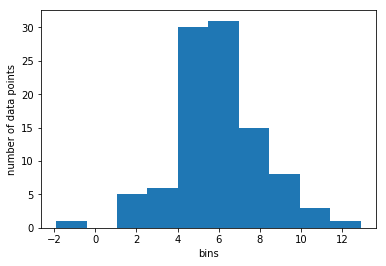

In [4]:
mu = 6.0
sig = 2.0
data = sig * rnd.standard_normal(100) + mu
a = plt.hist(data)
plt.xlabel('bins')
plt.ylabel('number of data points')
print('number of data points in each bin:', a[0])
print('limits of the bins:', a[1])

number of data points in each bin: [  0.   1.   4.   6.  21.  26.  15.   9.   8.   5.   2.   1.]
limits of the bins: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.]


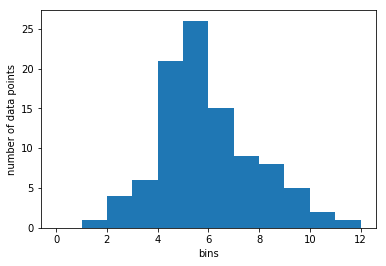

In [5]:
a = plt.hist(data, bins=12, range=(0, 12))
print('number of data points in each bin:', a[0])
print('limits of the bins:', a[1])
plt.xlabel('bins')
plt.ylabel('number of data points');

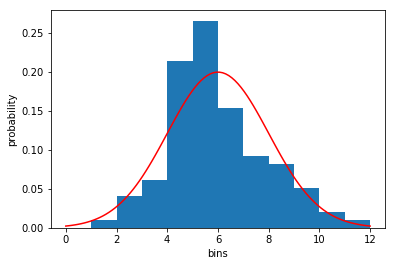

In [6]:
from scipy.stats import norm
a = plt.hist(data, bins=12, range=(0, 12), normed=True)
x = np.linspace(0, 12, 100)
y = norm.pdf(x, 6, 2) # mu=6, sig=2
plt.plot(x, y, 'r')
plt.xlabel('bins')
plt.ylabel('probability');

In [7]:
data = 2 * rnd.standard_normal(100) + 10  # mu=10, sigma=2, 100 points
lower, median, upper = np.percentile(data, [2.5, 50, 97.5])
print('2.5 percentile:', lower)
print('50 percentile:', median)
print('97.5 percentile:', upper)
print('95% interval:', lower, ' to ', upper)

2.5 percentile: 6.63593992792
50 percentile: 9.96892438626
97.5 percentile: 14.0371655913
95% interval: 6.63593992792  to  14.0371655913


In [8]:
norm.interval(0.95)

(-1.959963984540054, 1.959963984540054)

theoretical IQR: 17.3 22.7
IQR of data  16.88774593 22.0081515529


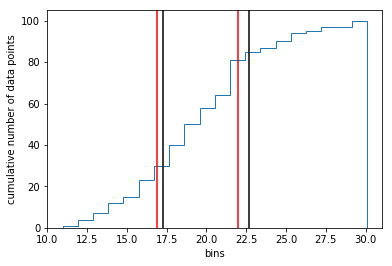

In [9]:
mu = 20.0
sig = 4.0
lower_theoretical = mu - 0.675 * sig
upper_theoretical = mu + 0.675 * sig
print('theoretical IQR:', lower_theoretical, upper_theoretical)
data = sig * rnd.standard_normal(100) + mu
lower, upper = np.percentile(data, [25, 75])
print('IQR of data ', lower, upper)
plt.hist(data, bins=20, cumulative=True, histtype='step')
plt.axvline(lower, color='r')
plt.axvline(upper, color='r')
plt.axvline(lower_theoretical, color='k')
plt.axvline(upper_theoretical, color='k')
plt.xlabel('bins')
plt.ylabel('cumulative number of data points');

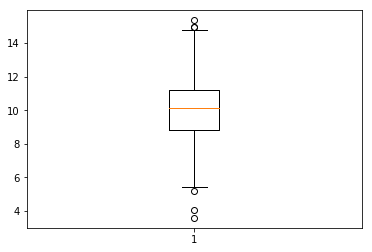

In [10]:
rnd.seed(10)
data = 2 * rnd.standard_normal(500) + 10.0  # mu=10, sigma=2, 500 points
a = plt.boxplot(data)

In [11]:
import pandas as pd
data = pd.DataFrame()
data['test1'] = 2 * rnd.standard_normal(100) + 3
data['test2'] = 1 * rnd.standard_normal(100) + 5
data.describe()

,test1,test2
count,100.000000,100.000000
mean,2.862210,5.101536
std,1.883256,0.933086
min,-2.632002,3.012896
25%,1.487364,4.512289
50%,2.742579,5.003217
75%,4.158108,5.631319
max,8.343370,7.662577


In [12]:
print('minimum of test1:', data.test1.min())
print('standard deviation of the DataFrame:')
print(data.std())
print('5% and 95% precentiles of test2:')
print(data.test2.quantile([0.05,0.95]))

minimum of test1: -2.6320024343
standard deviation of the DataFrame:
test1    1.883256
test2    0.933086
dtype: float64
5% and 95% precentiles of test2:
0.05    3.535725
0.95    6.821249
Name: test2, dtype: float64


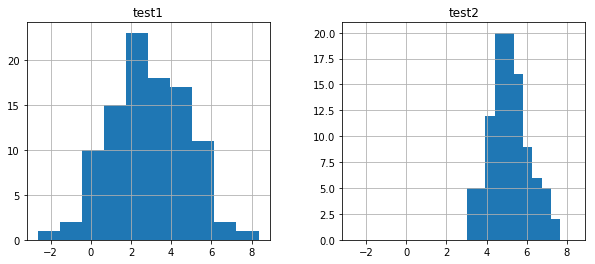

In [13]:
data.hist(sharex=True, figsize=(10, 4));

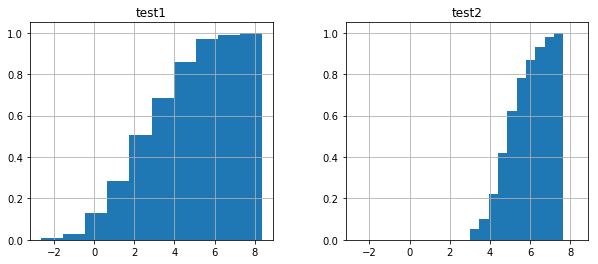

In [14]:
data.test1[5] = np.nan  # Replace the value with index 5 to nan
data.hist(cumulative=True, sharex=True, figsize=(10, 4), normed=True);

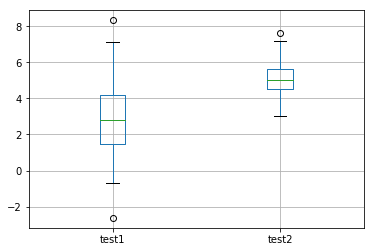

In [15]:
data.boxplot();

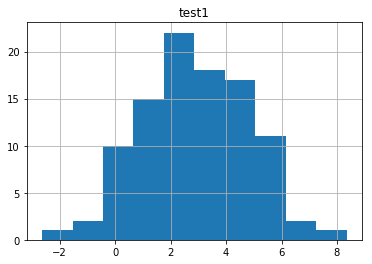

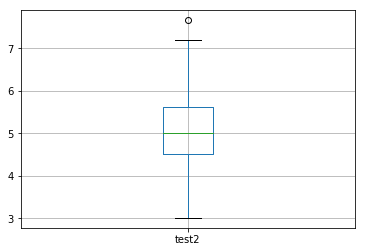

In [16]:
plt.figure()
a = data.hist(column='test1')  # Makes histogram of column test1
plt.figure()
a = data.boxplot(column='test2');  # Makes boxplot of column test2

In [17]:
a = pd.DataFrame()
a['data'] = rnd.randint(1, 10 + 1, 100)
print('unique values in data column:', a['data'].unique())

unique values in data column: [ 6  7 10  2  8  1  3  9  4  5]


In [18]:
from pandas import read_csv
w = read_csv('douglas_data.csv',skiprows=[1],skipinitialspace=True)
print('min and max bending strength: ', w.bstrength.min(), w.bstrength.max())
print('mean and std of density: ', w.density.mean(), w.density.std())
print('2.5%, 50%, 97.5% tree ring width: ', np.percentile(w.treering,[2.5,50,97.5]))

FileNotFoundError: File b'douglas_data.csv' does not exist

In [19]:
from pandas import read_csv
w = read_csv('douglas_data.csv',skiprows=[1],skipinitialspace=True)
print('2.5%, 50%, 97.5% tree ring width: ', w.treering.describe(percentiles=[0.025,0.5,0.975]))

FileNotFoundError: File b'douglas_data.csv' does not exist

In [20]:
print('mean moisture content: ', w.moisture.mean())
print('standard deviation of moisture content: ', w.moisture.std())
a = plt.boxplot(w.moisture)

NameError: name 'w' is not defined

In [21]:
plt.boxplot(w.moisture[w.moisture < 30])
plt.ylim(10.5, 17);

NameError: name 'w' is not defined

In [22]:
w.hist(column='bstrength', normed=True)
plt.xlabel('bending strength (N/m$^2$)')
five = w.bstrength.quantile(0.05)
print('5 empirical percentile: ', five)
plt.axvline(five, color='r');

NameError: name 'w' is not defined

In [23]:
from scipy.stats import norm
w.hist(column='bstrength', normed=True)
meanstrength = w.bstrength.mean()
stdstrength = w.bstrength.std()
x = np.linspace(0, 100, 100)
y = norm.pdf(x, loc=meanstrength, scale=stdstrength)
plt.plot(x, y, 'r')
plt.axvline(five, color='r')
plt.axvline(meanstrength - 1.64 * stdstrength, color='k');

NameError: name 'w' is not defined